# Introduction to Computer Vision and CNNs

### Trinity 2021 - Week 6 - 2021.06.01
### Lucas Kruitwagen
DPhil, Geography and the Environment, Smith School of Enterprise and the Environment
#### lucas.kruitwagen@gmail.com
#### @lucaskruitwagen
#### https://github.com/Lkruitwagen

## Contents - Week 6

1. Computer Vision Problems

1. Machine Learning Approach

1. Let's Code! TF+MNIST

1. What are CNNs?

1. History of CNNs

1. Let's Code! TF+MNIST+CNNs

1. Tutorial: Building a custom dataset

### 1. What is Computer Vision

Core problems in computer vision:

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/computer_vision_tasks.png" alt="drawing" style="display:inline" width="800"></img><sub>[1]</sub>

... Information extraction from spatially-structured data (e.g. images, video)

#### Example Applications

Optical Character Recognition | Facial Detection | Pose Detection 
 -- | ---------------- | -------------- 
 <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/license_plate.jpeg" alt="drawing" style="display:inline" width="300"></img><sub>[2]</sub> |   <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/friends.gif" alt="drawing" style="display:inline" width="300"></img><sub>[3]</sub>  |   <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/dance.gif" alt="drawing" style="display:inline" width="300"></img><sub>[4]</sub>  
 
Self-driving Vehicles | Anomaly Detection | Medical Imagery
--------------------- | ----------------- | --------------
 <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/selfdriving.gif" alt="drawing" style="display:inline" width="300"></img><sub>[5]</sub>  | <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/anomaly.jpg" alt="drawing" style="display:inline" width="300"></img><sub>[6]</sub>  | <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/medical.png" alt="drawing" style="display:inline" width="300"></img><sub>[7]</sub> 

#### More examples from Climate Change + AI

**Remote Sensing Solar PV Facilities - A global inventory**

Solar PV is a key technology for mitigating climate change while increasing energy access in the Global South. Coauthors and I have used ML with remote sensing imagery to search the entire planet for solar PV facilities and determine their installation dates - critical data for supporting policy, engineering, and planning.

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/fig-1_samples.png" alt="drawing" style="display:inline" height="500"></img> 

<sub>Kruitwagen, L., Story, K., Friedrich, J., Buyers, L., Skillman, S., Hepburn, C. (2021) In peer review at _Nature_. Supported by DescartesLabs Inc., the World Resources Insistute, and computing grants from AWS and GCP.</sub>

**Cloud Type Detection for causal inference of aersol effects**

The planet's energy balance is sensitive to the reflectance of marine boundary layer clouds. Cloud reflectance is determined by its mesoscale structure. Anthropogenic aerosols cause transitions in these structures. Coauthors and I use unsupervised ML to characterise cloud types and then isolate aerosol causal effects.

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/fdl.gif" alt="drawing" style="display:inline" height="500"></img> 

<sub>Christensen, M., Jones, W., Kusner, M., Kruitwagen, L., Pearce, T., Saengkyongam, S., Watson-Parris, D. (2020) *Aerosol Effects on Mesoscale Structures in Marine Boundary Layer Clouds*. Supported by the European Space Agency and the Frontier Development Lab.</sub>

**Flood Detection and Mapping**

Timely flood mapping is crucial for emergency response efforts. Lightweight flood-mapping models can be implemented on spacecraft for streaming inference and alert systems.

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/ml4cc.png" alt="drawing" style="display:inline" height="500"></img> 

<sub>Ahmed, N., Budd, S., Kruitwagen, L., Mateo-Garcia, G., Maynard-Reid, M., Praveen, S., Roth, N. (alph.) (2021) A Machine-Learning for Climate Change (ML4CC) project. Supported by Trillium Technologies Ltd and UNOSAT.</sub>

**Multispectral+Radar Self-Supervised Sensor Fusion**

Self-supervised sensor fusion of Sentinel-1 synthetic-aperature radar and Sentinel-2 multispectral data for general purpose semantic embeddings, leading to a proliferation of low-data use cases.

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/deepsentinel.png" alt="drawing" style="display:inline" height="500"></img> 

<sub>Kruitwagen, L. (2020) *DeepSentinel*. Supported by Microsoft AI for Earth and the European Space Agency.</sub>

**Image References**

<sub>[1] Li, F, Johnson, J., Yeung, S. (2017) http://cs231n.stanford.edu/slides/2017/cs231n_2017_lecture11.pdf</sub>
<sub>[2] https://medium.com/@quangnhatnguyenle/detect-and-recognize-vehicles-license-plate-with-machine-learning-and-python-part-1-detection-795fda47e922</sub>
<sub>[3] https://towardsdatascience.com/real-time-face-recognition-with-cpu-983d35cc3ec5</sub>
<sub>[4] https://nanonets.com/blog/human-pose-estimation-2d-guide/</sub>
<sub>[5] https://towardsdatascience.com/semantic-segmentation-popular-architectures-dff0a75f39d0</sub>
<sub>[6] https://www.ricoh.com/technology/tech/073_imagerecognition</sub>
<sub>[7] https://www.nature.com/articles/s41598-019-42557-4</sub>

### 2. Machine Learning Approach

Like other domains, we have some data, $X$, with which we want to predict some target, $Y$. We're looking for a function:

$F(X,\theta) = \hat{Y} \approx Y$

We can use a neural network, parameterised by $\theta$ as a universal approximator. As long as $F$ is differentiable, we can define a loss function $\mathcal{L}(\hat{Y}, Y)$ which we can minimise to find the values $\tilde{\theta}$ that maximises the likelihood function:

$\tilde{\theta} = \text{argmin } \mathcal{L}(F(X,\theta),Y)$

Common loss functions are MSE (L2 loss) for regression problems and cross-entropy for classification problems. These loss functions are smooth and concave, so gradient descent can be used to solve for $\tilde{\theta}$ corresponding to the global minimum of $\mathcal{L}$.

We also want to ensure our function $F$ is generaliseable to $X'$ and $Y'$ not in $X$ and $Y$, i.e. that neither the model nor parameters have been overfit to the available data. Parameter overfit is mitigated by regularisation via random dropout. Model overfit is managed by retaining an out-of-sample _validation set_ alongside the _training set_, and _test set_.
* **training set**: used to solve for parameters $\tilde{\theta}$
* **validation set**: used to explore the hyperparameter space 
* **test set**: used to report the out-of-sample performance of the maxmimum likelihood estimator

Sometimes training data from different distributions can be used to train a single model. Multiple training sets and additional _training-validation_ sets can be used, but a machine learning problem should use only a single validation set drawn from the same distribution of the test set.

#### Approach in Computer Vision

##### A single sample $X$

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/sample_X.png" alt="drawing" style="display:inline" width="800"></img>

C: Channels; H: Height (pixels); W: Width (pixels)

**NB:** Tensorflow: "channels-last", i.e. [H,W,C]; PyTorch: "channels-first", i.e. [C,H,W]

##### A single target $Y$

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/sample_Y.png" alt="drawing" style="display:inline" width="1000"></img>

How it used to be done:

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/traditional_cv.png" alt="drawing" style="display:inline" width="800"></img><sub>[8]</sub>

Feature engineering: mathematical transforms of the input image that the expert hypothesizes are important for the downstream task, e.g. edge detection, color, color gradiants. Convolutions were used with hand-crafted filters to get feature maps for an image.

 Engineered features | convolution | Original Image | E.g. edge detection
 ---- | ------ | ------ | ----
 <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/lecun_2015_features.png" alt="drawing" style="display:inline" width="200"></img><sub>[9]</sub> | <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/convolution.gif" alt="drawing" style="display:inline" width="400"></img> | <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/camera.png" alt="drawing" style="display:inline" width="200"></img> |  <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/edge_copy.png" alt="drawing" style="display:inline" width="200"></img>


How it's done now:

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/dl_cv.png" alt="drawing" style="display:inline" width="800"></img><sub>[8]</sub>

**Image References**

<sub>[8]: O'Mahony, N., Campbell, S., Carvalho, A., Harapanahalli, S., Velasco-Hernandez, G., Krpalkova, L., Riordan, D., Walsh, J. (2019) https://arxiv.org/abs/1910.13796</sub>
<sub>[9]: LeCun, Y., Bengio, Y., Hinton G. (2015) https://www.nature.com/articles/nature14539</sub>

### 3. Computer Vision Hello World: MNIST
**M**odified **N**ational **I**nstitute of **S**tandards and **T**echnology database: 70,000 grayscale pictures of hand-written digits 0-9, 28x28px.

The original problem: how to machine-read US zip codes on letter envelopes. Now a ML benchmark and teaching dataset.

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/mnist.png" alt="drawing" style="display:inline" width="600"></img>

### Let's Code!

First, let's set up our Jupyter environment if we have to. 

**On Google Colab:** No need for further set up, all packages are already installed

**On ox-sbs-ml-bd Binder:** No need for further set up, all packages are already installed

**On GCP Jupyter Lab:** Select environment TensorFlow:2.4, no need for further set up. Recommended for GPU.

**All Others:** Follow conda environment setup at [ox-sbs-ml-db README](https://github.com/jeremy-large/ox-sbs-ml-bd/blob/lk-cv/README.md)

Then, let's import our dependencies.

In [1]:
import os, sys, glob                 # some built-ins 

from PIL import Image                # image manipulation
import requests                      # http requests
import matplotlib.pyplot as plt      # visualisation
import numpy as np                   # data maniputlations
from scipy.signal import convolve2d  # to demo convolution

import tensorflow as tf
import tensorflow_datasets as tfds   # built-in MNIST

*You may wish to also set up your Lab environment if possible. Some helpful commands:*

Watch GPU loading: `watch nvidia-smi -i 1`

Watch CPU and memory loading: `htop`

In [2]:
tf.config.list_physical_devices()    # let's check that TF is GPU-ready

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
### set a root directory for managing 
root = os.path.abspath(os.path.join(os.getcwd(),'..'))

**NOTE: Binder hangs with a port error with tfds.**

If using Binder, first download MNIST from where I've mirrored it on github:

In [ ]:
###If using Binder:
os.makedirs(os.path.join(root,'data','mnist','3.0.1'))

for f in ['dataset_info.json','image.image.json','mnist-test.tfrecord-00000-of-00001','mnist-train.tfrecord-00000-of-00001']:
    !wget https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/data/{f} -O {root}/data/mnist/3.0.1/{f} -q

In [4]:
### Load the MNIST dataset iterators
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',                      # TFDS has MNIST built-in
    data_dir=os.path.join(root,'data'),
    split=['train', 'test'],      # MNIST only has train and test data... fine for today
    as_supervised=True,           # dataset generators include samples and labels 
    with_info=True,               # also return dataset metadata
)

In [5]:
type(ds_train), type(ds_test)

(tensorflow.python.data.ops.dataset_ops.PrefetchDataset,
 tensorflow.python.data.ops.dataset_ops.PrefetchDataset)

`ds_train` and `ds_test` are *generators*. They serve our data to the ML model, manage batchsize and parallelisation, and can be customised with augmentations.

In [6]:
### Inspect our data
sample_X, sample_Y = next(ds_train.as_numpy_iterator())             # get a single sample
print ('Single sample:',type(sample_X), type(sample_Y), sample_X.shape, sample_Y.shape)

sample_X, sample_Y = next(ds_train.batch(100).as_numpy_iterator())  # get a batch of 100 samples
print ('Batch sample:',type(sample_X), type(sample_Y), sample_X.shape, sample_Y.shape)

Single sample: <class 'numpy.ndarray'> <class 'numpy.int64'> (28, 28, 1) ()
Batch sample: <class 'numpy.ndarray'> <class 'numpy.ndarray'> (100, 28, 28, 1) (100,)


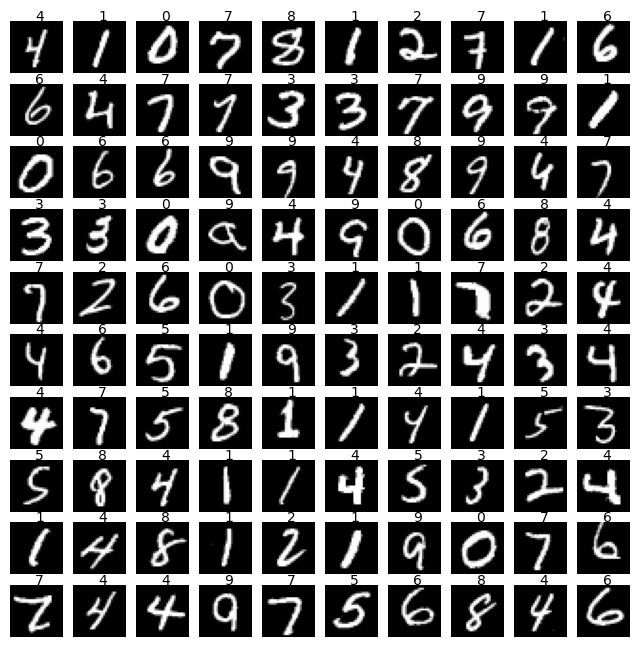

In [7]:
### Visualisat our data
fig, axs = plt.subplots(10,10,figsize=(8,8))
axs = axs.flatten()                                           # flatten array of axes (10,10) -> (100,)
for ii in range(100):
    axs[ii].text(13,-1,str(sample_Y[ii]),color='k')           # annotate above axis
    axs[ii].imshow(np.squeeze(sample_X[ii,:,:]), cmap='gray') # squeeze out the channel dimension
    axs[ii].axis('off')
plt.show()

**What about old-school computer vision?**

With hand-crafted filters and convolutions?

'Image data shape: (427, 428)'

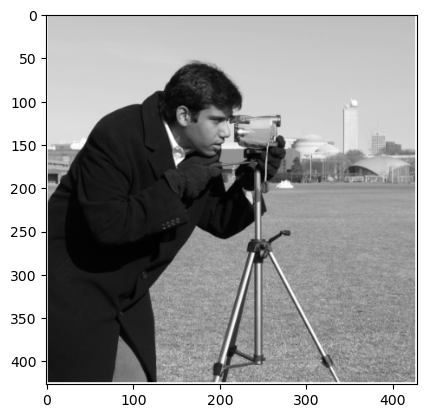

In [8]:
### Demo: Old school computer vision
url =  'https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/camera.png'
im = Image.open(requests.get(url, stream=True).raw).convert('L')   # get the image data, convert to grayscale
arr = np.array(im)
plt.imshow(arr, cmap='gray')
'Image data shape: {}'.format(arr.shape)

In [9]:
### define a filter to detect a feature... say an edge filter
edge_filter = np.array([
    [-1,0,1],
    [-1,0,1],
    [-1,0,1],
])

In [10]:
### What shapes do we get after different types of convolution?
print ('full:',convolve2d(arr,edge_filter, mode='full').shape)
print ('valid:',convolve2d(arr,edge_filter, mode='valid').shape)
print ('same:',convolve2d(arr,edge_filter, mode='same').shape)

full: (429, 430)
valid: (425, 426)
same: (427, 428)


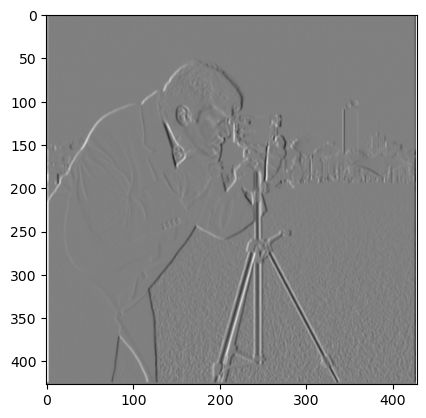

In [11]:
### What does the convolved featuremap look like?
plt.imshow(convolve2d(arr,edge_filter, mode='same'), cmap='gray')

### Let's build on what we know - multiclass classification with scikit learn

We want a multi-class classifier because our labels are one of 10 digits. We can make one with an ensemble of one-vs-all classifiers conveniently implemented by sklearn. We can use a SVM for each class' classifier.

In [12]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

We have a nice small dataset that can fit in memory. Let's get it all from our TF datasets into numpy arrays.

In [13]:
X_trn = np.array([_x for _x, _y in ds_train.as_numpy_iterator()])
Y_trn = np.array([_y for _x, _y in ds_train.as_numpy_iterator()])
X_test = np.array([_x for _x, _y in ds_test.as_numpy_iterator()])
Y_test = np.array([_y for _x, _y in ds_test.as_numpy_iterator()])

Image data usually comes in as Byte integers. Let's normalise our input data and change it to float. Float64 is a bit excessive, so let's go with Float32.

In [14]:
print('raw data:',X_trn.max(), X_trn.min(), X_trn.dtype)
X_trn, X_test = (X_trn/255.).astype(np.float32), (X_test/255.).astype(np.float32)
print('normalised:',X_trn.max(), X_trn.min(), X_trn.dtype)

raw data: 255 0 uint8
normalised: 1.0 0.0 float32


Our targets are current stored as categorical values represented by integers. We need to 'one-hot' encode them to a vector of [0,1] targets.

In [15]:
n_classes = np.unique(Y_trn).shape[0]

In [16]:
def one_hot_encode(targets, n_classes):
    return np.eye(n_classes)[targets]

In [17]:
Y_trn = one_hot_encode(Y_trn, n_classes)
Y_test = one_hot_encode(Y_test, n_classes)

Last thing - we need to flatten our training data X. The classifier expects a 2D dataframe of [n_samples,m_features]. Each pixel-channel datum will be a feature.

In [18]:
X_trn = X_trn.reshape(X_trn.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)
print (X_trn.shape)

(60000, 784)


In [19]:
### train our one-vs-all classifier
classifier = OneVsRestClassifier(KNeighborsClassifier(3)).fit(X_trn, Y_trn)

In [ ]:
### run prediction on our test data
# note this takes a looong time...
Y_test_hat = classifier.predict(X_test)

In [ ]:
# use np.argmax to return test data to categorical
accuracy = (np.argmax(Y_test_hat, axis=1)==np.argmax(Y_test, axis=1)).sum()/Y_test.shape[0]

In [ ]:
accuracy

~96%

### A simple deep neural network with TF

As before, we need to normalise our data and cast it to Float32. We can use tf.dataset.map to map a normalising function over all our data.

In [20]:
def normalise_mapper(sample, target):                     # sample and target are now tf tensors
    return tf.cast(tf.squeeze(sample), tf.float32) / 255., target      # return the (image, label) tuple

In [21]:
# AUTOTUNE - > allows TF to decide how many CPU processes to use
ds_train = ds_train.map(normalise_mapper, num_parallel_calls=tf.data.experimental.AUTOTUNE)   
ds_test = ds_test.map(normalise_mapper, num_parallel_calls=tf.data.experimental.AUTOTUNE)

Configure the data pipeline:
- *cache*: for a small dataset, read it only once and keep it in memory
- *shuffle*: randomly select dataset elements. 
- *batch*: set the batch size
- *prefetch*: allow the data pipeline to fetch samples while the model is running and updating

In [22]:
# set the generator to cache in memory
ds_train = ds_train.cache()

# Set the buffer to the full dataset for small datasets
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples) 

# 128 a nice power of 2
ds_train = ds_train.batch(128)                           

# allow TF to decide how many processes to prefect data with
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)       

ds_test = ds_test \
    .cache() \
    .shuffle(ds_info.splits['test'].num_examples) \
    .batch(128) \
    .prefetch(tf.data.experimental.AUTOTUNE)

Build a simple fully-connected neural network with two hidden layers

In [23]:
model = tf.keras.models.Sequential([
    # a non-parameterised layer to flatten our image data for full-connection
    tf.keras.layers.Flatten(input_shape=(28, 28)),  
    
    # a fully connected layer with ReLU activation
    tf.keras.layers.Dense(128,activation='relu'),   
    
    # a dropout layer for regularisation
    tf.keras.layers.Dropout(0.5),      
    
    # an output layer with same dimension as our targets
    tf.keras.layers.Dense(10)                        
])

In [24]:
# use `.summary()` to get a nice summary of the layers of your model 
model.summary()                                    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(
    # ADAM optimizer -> always a good first bet
    optimizer=tf.keras.optimizers.Adam(0.001),          
    # from_logits -> don't need to one-hot the targets
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),    
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [26]:
model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)

Epoch 1/10
469/469 [==============================] - 6s 9ms/step - loss: 0.8231 - sparse_categorical_accuracy: 0.7458 - val_loss: 0.2233 - val_sparse_categorical_accuracy: 0.9342
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2884 - sparse_categorical_accuracy: 0.9177 - val_loss: 0.1596 - val_sparse_categorical_accuracy: 0.9540
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2226 - sparse_categorical_accuracy: 0.9354 - val_loss: 0.1363 - val_sparse_categorical_accuracy: 0.9605
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1924 - sparse_categorical_accuracy: 0.9445 - val_loss: 0.1224 - val_sparse_categorical_accuracy: 0.9656
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.1802 - sparse_categorical_accuracy: 0.9480 - val_loss: 0.1132 - val_sparse_categorical_accuracy: 0.9672
Epoch 6/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1644 - sparse_categorica

Our basic neural net improved accuracy from ~96% to ~97%. Is this good enough? 

... would you put your passport in the mail if you knew it only had a 97% chance of reaching the intended destination?

Let's train a deeper model!?

In [27]:
### let's train a deeper model!
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),   
  tf.keras.layers.Dense(256,activation='relu'), 
  tf.keras.layers.Dropout(0.5),                 
  tf.keras.layers.Dense(64,activation='relu'),    
  tf.keras.layers.Dropout(0.5),                   
  tf.keras.layers.Dense(10)                   
])

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
________________________________________________

In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),                            
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [30]:
model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test,
)

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.9828 - sparse_categorical_accuracy: 0.6753 - val_loss: 0.2018 - val_sparse_categorical_accuracy: 0.9405
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3098 - sparse_categorical_accuracy: 0.9133 - val_loss: 0.1358 - val_sparse_categorical_accuracy: 0.9596
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2377 - sparse_categorical_accuracy: 0.9334 - val_loss: 0.1235 - val_sparse_categorical_accuracy: 0.9615
Epoch 4/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2005 - sparse_categorical_accuracy: 0.9432 - val_loss: 0.1016 - val_sparse_categorical_accuracy: 0.9705
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1788 - sparse_categorical_accuracy: 0.9505 - val_loss: 0.0924 - val_sparse_categorical_accuracy: 0.9713
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1625 - sparse_categori

Okay with some more layers and parameters we get ~98%. Is this enough?

### Back to the future with convolutions!

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/convolution.gif" alt="drawing" style="display:inline" width="500"></img>

What if instead of hand-crafting features, we _learned_ them instead?

Inspired by biology, where cortical neurons activate according to receptive fields in the retina. 

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/photoreceptors.png" alt="drawing" style="display:inline" width="600"></img>

Can we train a neural network where the input to neurons in each successive layer is a receptive field?

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/receptive_field_layers.gif" alt="drawing" style="display:inline" width="600"></img>

And then we use multiple layers of these receptor-field neurons to extract _higher level_ features?

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/lecun_2015.png" alt="drawing" style="display:inline" width="600"></img>

This is what we're going to do with a **convolutional neural network**. We're going to convolve a kernel of weights and baises over an input image to get a first feature layer, then another kernel over those features to get deeper features, and so on.

### History of CNNs

Let's take a quick look at the history of CNNs and while we do this build up a bit of intuition about how they work and how they're designed.

**LeNet-5, 1989. the OG.**

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/lenet_5.png" alt="drawing" style="display:inline" width="800"></img>

LeCun, Y.; Boser, B.; Denker, J. S.; Henderson, D.; Howard, R. E.; Hubbard, W. & Jackel, L. D. (1989). Backpropagation applied to handwritten zip code recognition. Neural Computation, 1(4):541-551.

How do we read this diagram?

**observations**
- Feature maps now retain their spatial orientation
- They increase in channel dimension with increasing layer, but decrease in spatial dimension. There is a _trade off_ between the spatial and semantic features
- This paper was also significant in establishing backprop as the training method.

**intuitions**
- When we previously flattening our image, we threw out important information about the location of pixels. With CNNs, because each feature corresponds to a receptive field of previous features, we retain this locational information.
- What about ~~pooling~~ subsampling?
  - constrains the parameter space (trade-off in spatial vs semantic features)
  - sequential 'bottleneck' helps learn compression efficiently
- If we unspooled a CNN, we would get a sparsely connected DNN. This is like regularisation - dropping out connections - except with this method, we're _heuristically_ dropping out connections according to their spatial orientation.

**1990 - 2010: Second AI Winter**

but then...

2009: ImageNet Large Scale Visual Recognition Challenge: 14mn images, 20k classes

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/imagenet.png" alt="drawing" style="display:inline" width="400"></img>

**AlexNet 2012**

Contribution:
- GPU training
- Paralellised GPU training
- ReLU Activation + dropout

<img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/alexnet.png" alt="drawing" style="display:inline" width="800"></img>

Krizhevsky, Alex, Ilya Sutskever, and Geoffrey E. Hinton. "Imagenet classification with deep convolutional neural networks." Advances in neural information processing systems 25 (2012): 1097-1105.

**2010 - ???: AI hype cycle**

<table>
    <tr>
        <td> <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/nvidia.png" alt="drawing" style="display:inline" width="800"></img></td>
        <td>
            <table>
                <tr><td>2004</td></tr>
                <tr>
                    <td>
                        <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/nvidia_2004.png" alt="drawing" style="display:inline" width="400"></img>
                    </td>
                </tr>
                <tr><td>2017</td></tr>
                <tr>
                    <td>
                        <img src="https://raw.githubusercontent.com/Lkruitwagen/teaching/main/cv/assets/nvidia_2017.jpg" alt="drawing" style="display:inline" width="400"></img> 
                    </td>
                </tr>
            </table>          
       </td>
    </tr>
</table>

**Why GPUs?**

Same with DNNs, the forward and backward passes involve _a lot_ of vector calculations. GPUs, designed for massively-parallelised vector calculations for video games and animation, found new uses with 'general purpose' GPU computation.

### Let's Code!

Let's implement some CNNs for our previous MNIST problem

In [31]:
model = tf.keras.models.Sequential([
    # our data is (28,28) so need to reshape it to (28,28,1) WxHxC
    tf.keras.layers.Reshape((28,28,1), input_shape=(28,28)),   
    
    # 3x3x6 filters, with relu activation, stride=(1,1)
    tf.keras.layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', strides=(1, 1)),    
    
    # our pooling layer, also called 'block reduce'
    tf.keras.layers.AveragePooling2D(),                         
    
    #  ... no dropout regularisation in convolutional blocks
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', strides=(1, 1)),   
    
    #  ... use BatchNorm instead (more on this later)
    tf.keras.layers.AveragePooling2D(),      
    
    # flatten prior to full-connection 
    tf.keras.layers.Flatten(),                       
    
    # dense fully-connected layer with relu activation
    tf.keras.layers.Dense(units=120, activation='relu'),        
    
    # here we can use dropout again
    tf.keras.layers.Dropout(0.5),                                                                
    tf.keras.layers.Dense(units=84, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    # softmax because only a single label per sample
    tf.keras.layers.Dense(units=10, activation='softmax'),  
], name='LeNet-5')

In [32]:
model.summary()

Model: "LeNet-5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)               4812

60k parameters! Much less than our dense DNNs. Let's see how it does.

In [33]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),                            
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [34]:
model.fit(
    ds_train,
    epochs=5,
    validation_data=ds_test,
)

Epoch 1/5
469/469 [==============================] - 25s 51ms/step - loss: 1.2021 - sparse_categorical_accuracy: 0.5933 - val_loss: 0.1566 - val_sparse_categorical_accuracy: 0.9536
Epoch 2/5
469/469 [==============================] - 17s 35ms/step - loss: 0.2759 - sparse_categorical_accuracy: 0.9231 - val_loss: 0.0958 - val_sparse_categorical_accuracy: 0.9713
Epoch 3/5
469/469 [==============================] - 23s 49ms/step - loss: 0.1905 - sparse_categorical_accuracy: 0.9482 - val_loss: 0.0726 - val_sparse_categorical_accuracy: 0.9785
Epoch 4/5
469/469 [==============================] - 26s 55ms/step - loss: 0.1509 - sparse_categorical_accuracy: 0.9584 - val_loss: 0.0647 - val_sparse_categorical_accuracy: 0.9816
Epoch 5/5
469/469 [==============================] - 25s 53ms/step - loss: 0.1356 - sparse_categorical_accuracy: 0.9633 - val_loss: 0.0567 - val_sparse_categorical_accuracy: 0.9834


Wow! 99% accuracy out of the box! Now we're talking!

## Tutorial: Building a custom dataset

We've been using the built-in MNIST dataset. What if we want to use our own dataset? Say we collected a number of samples and saved them on disk. How can we build a model and serve it data?

In [36]:
### let's work with some new data. Let's download Flowers
!wget -c https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz -O - | tar -xz -C {root}/data

--2021-05-20 18:40:45--  https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.136.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228813984 (218M) [application/x-compressed-tar]
Saving to: ‘STDOUT’

-                   100%[===================>] 218.21M  86.4MB/s    in 2.5s    

2021-05-20 18:40:47 (86.4 MB/s) - written to stdout [228813984/228813984]



We're going to create a custom `tf.data.Dataset` to use for training our CNNs. For efficient neural network training, we want to use all of our GPU and CPU resources concurrently. We also have certain tasks that we might want to do before loading it into the model, e.g. normalisation, random augmentations, etc. 

We can write a custom data generator that `tf.data` knows how to handle. This generator will be a function with a `yield` instead fo `return`. We can then pass this generator to the `tf.data.from_generator` method to get a custom dataset. 

[TF documentation](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_generator)

Import some methods from `scikit-image` to work with image data

In [40]:
from skimage.io import imread         # read an image to a np array
from skimage.transform import resize  # resize an image
from skimage.util import crop, pad    # crop or pad an image

from random import shuffle            # shuffle a list of elements in-place

In [41]:
### first, let's get all the image records
records = [{
    'flower':f.split('/')[-2],
    'path':f
} for f in glob.glob(os.path.join(root,'data','flower_photos','**','*.jpg'))]

print(records[0])

{'flower': 'roses', 'path': '/home/jupyter/ox-sbs-ml-bd/data/flower_photos/roses/269037241_07fceff56a_m.jpg'}


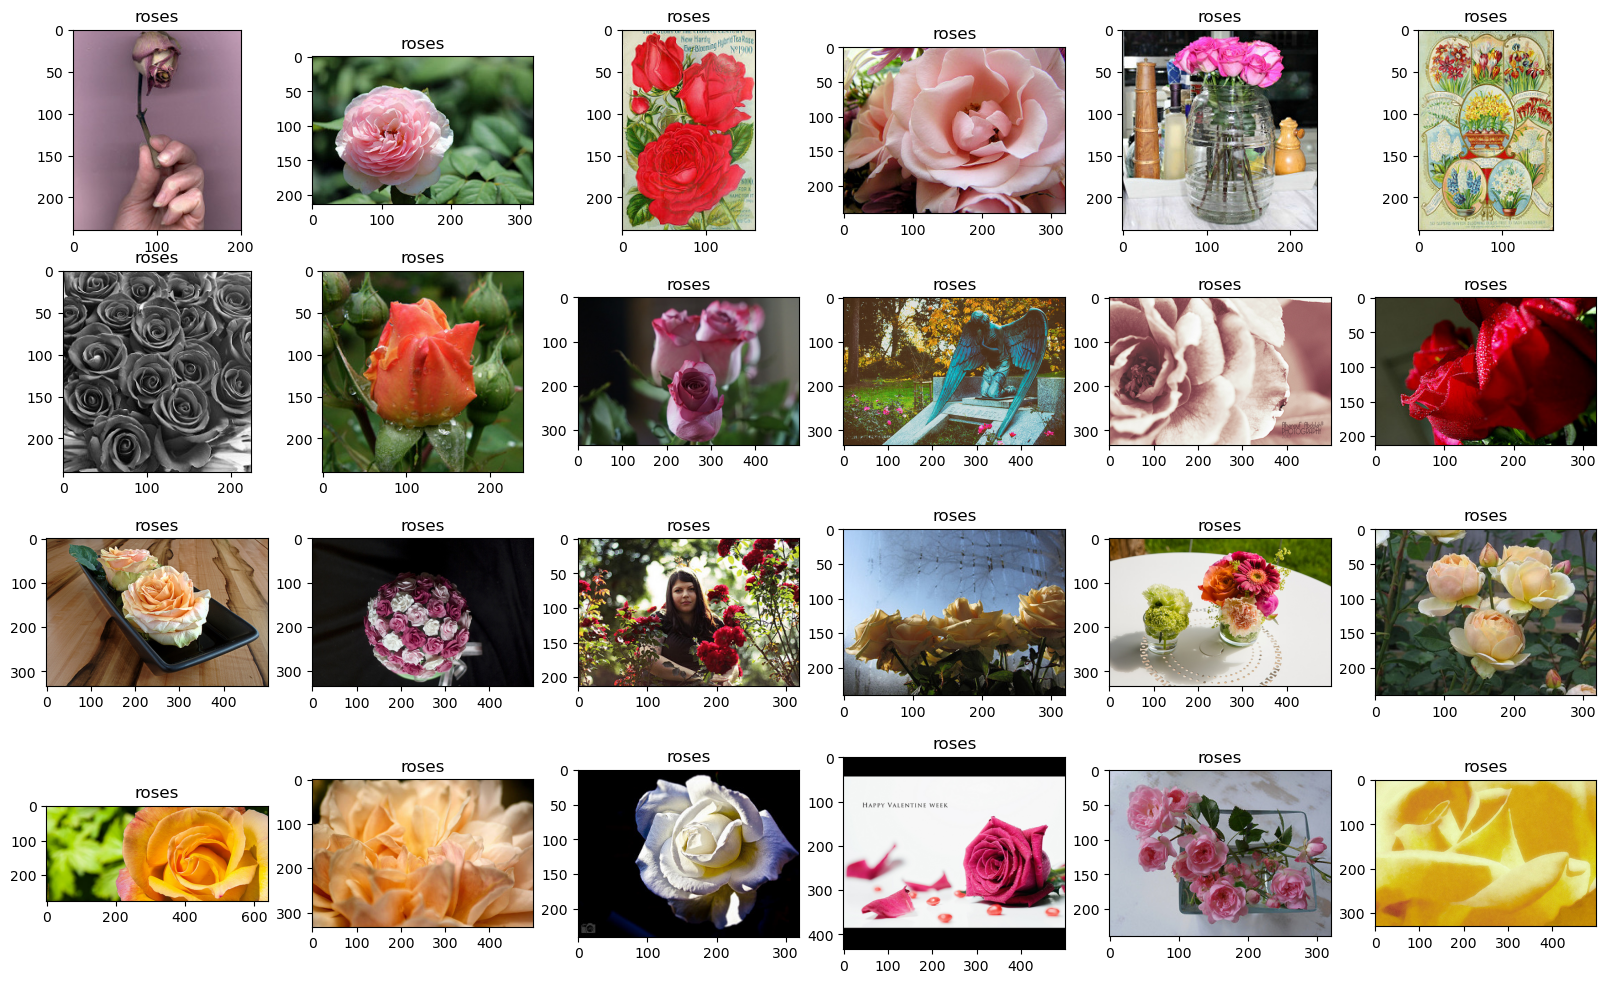

In [42]:
### visualise our data
fig, axs = plt.subplots(4,6,figsize=(20,12))
axs=axs.flatten()
for ii_r,r in enumerate(records[0:24]):
    arr = imread(r['path'])
    axs[ii_r].imshow(arr)
    axs[ii_r].set_title(r['flower'])
plt.show()

We often need to get our data into uniform dimension. How can we do this?

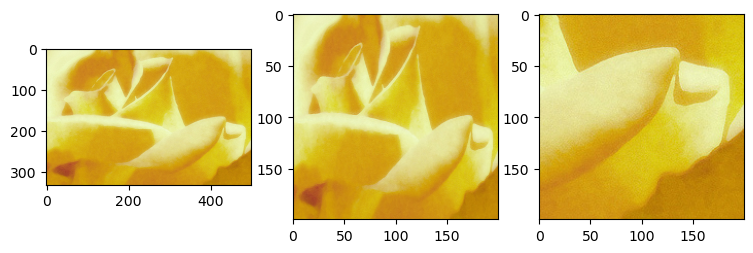

flower class: roses


In [43]:
### visualise some resizing and crops
fig, axs = plt.subplots(1,3,figsize=(9,3))
axs[0].imshow(arr)
axs[1].imshow(resize(arr,(200,200)))
axs[2].imshow(crop(arr,[(arr.shape[0]-200,0),(arr.shape[1]-200,0),(0,0)]))
plt.show()
print ('flower class:',records[0]['flower'])

Let's write our generator!

In [55]:
def flowers_generator(records, output_shape=(200,200), mode='random_crop'):
    ### a wrapper for our generator. Takes all our parameters and returns the generator.
    
    # one-hot encode our classes
    mapper = {'dandelion': 0, 'sunflowers': 1, 'daisy': 2, 'tulips': 3, 'roses': 4}

    def _generator():
        ### The internal generator must not take any parameters.

        for r in records:

            # io
            x = (imread(r['path'])/255.).astype(np.float32)
            y = np.array(mapper[r['flower']]).astype(np.float32)

            # reduce dimension of array
            if mode=='resize':
                x = resize(x,output_shape)
            elif mode=='random_crop':
                crop_width = [(0,0)]*3
                pad_width  = [(0,0)]*3
                for ax in [0,1]:
                    if x.shape[ax]>output_shape[ax]:
                        crop_val=np.random.choice(x.shape[ax]-output_shape[ax])
                        crop_width[ax] = (crop_val, x.shape[ax]-output_shape[ax]-crop_val)
                    elif x.shape[ax]<output_shape[ax]:
                        pad_val = np.random.choice(output_shape[ax]-x.shape[ax])
                        pad_width[ax] = (pad_val,output_shape[ax]- x.shape[ax]-pad_val)
                        
                x = crop(x, crop_width)
                x = pad(x, pad_width)

            yield tf.convert_to_tensor(x), tf.convert_to_tensor(y)
            
    return _generator

Let's train using our new generator!

In [56]:
### shuffle the records 
shuffle(records)

In [57]:
trn_split=0.7
val_split=0.9

In [58]:
generator_obj_trn = flowers_generator(
    records[0:int(trn_split*len(records))], 
    output_shape=(200,200), 
    mode='resize'
)
generator_obj_val = flowers_generator(
    records[int(trn_split*len(records)):int(val_split*len(records))], 
    output_shape=(200,200), 
    mode='resize'
)

In [59]:
next(iter(generator_obj_trn)) # not an instance

TypeError: 'function' object is not iterable

In [66]:
ds_flowers_trn = (
    tf.data.Dataset.from_generator(
     generator_obj_trn,
     output_signature=(
         tf.TensorSpec(shape=(200,200,3), dtype=tf.float32),
         tf.TensorSpec(shape=(), dtype=tf.float32)))
    ) \
    .cache().batch(128).prefetch(tf.data.experimental.AUTOTUNE)

ds_flowers_val = (
    tf.data.Dataset.from_generator(
     generator_obj_val,
     output_signature=(
         tf.TensorSpec(shape=(200,200,3), dtype=tf.float32),
         tf.TensorSpec(shape=(), dtype=tf.float32)))
    ) \
    .cache().batch(128).prefetch(tf.data.experimental.AUTOTUNE)

In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=96, kernel_size=(9, 9), activation='relu', strides=(3, 3), input_shape=(200,200,3)),   
    # AlexNet -> MaxPool
    tf.keras.layers.MaxPooling2D(),                                                              
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5, 5), activation='relu', strides=(1, 1)), 
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3, 3), activation='relu', strides=(1, 1), padding='same'),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3, 3), activation='relu', strides=(1, 1), padding='same'),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', strides=(1, 1), padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),                                                          
    tf.keras.layers.Dense(units=128, activation='relu'),   
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=5, activation='softmax'),  
], name='My-AlexNet')

In [68]:
model.summary()

Model: "My-AlexNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 96)        23424     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 256)       614656    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 384)       885120    
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 384)       1327488   
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 256)       8

In [69]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),                          
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [70]:
model.fit(
    ds_flowers_trn,
    epochs=5,
    validation_data=ds_flowers_val,
)

Epoch 1/5
21/21 [==============================] - 235s 11s/step - loss: 1.6543 - sparse_categorical_accuracy: 0.2526 - val_loss: 1.5598 - val_sparse_categorical_accuracy: 0.2548
Epoch 2/5
21/21 [==============================] - 172s 8s/step - loss: 1.5621 - sparse_categorical_accuracy: 0.2720 - val_loss: 1.4662 - val_sparse_categorical_accuracy: 0.3025
Epoch 3/5
21/21 [==============================] - 172s 8s/step - loss: 1.4469 - sparse_categorical_accuracy: 0.3375 - val_loss: 1.4197 - val_sparse_categorical_accuracy: 0.3420
Epoch 4/5
21/21 [==============================] - 171s 8s/step - loss: 1.4096 - sparse_categorical_accuracy: 0.3790 - val_loss: 1.3180 - val_sparse_categorical_accuracy: 0.4251
Epoch 5/5
21/21 [==============================] - 172s 8s/step - loss: 1.2959 - sparse_categorical_accuracy: 0.4407 - val_loss: 1.2835 - val_sparse_categorical_accuracy: 0.5027


50% in 5 epochs! Nice one!